Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

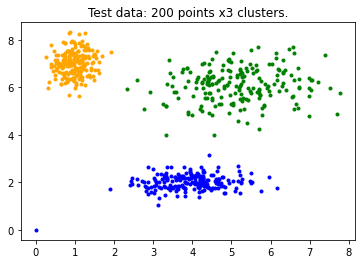

In [75]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

### Fuzzy Membership Function, Triangular

This function will give a membership value (between 0 and 1) based on scores provided, scores can be in multiple sets at the same time.

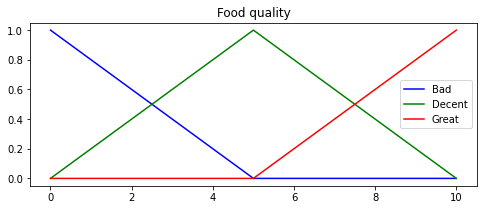

In [76]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
plt.show()

### Membership Function, Trapezoidal

Get a membership value (between 0 and 1) for the 3 classes for temperature, some temperatures can be between two, such as cold and medium temperature for instance, so fuzzy lets us represent that by having some values being in two sets

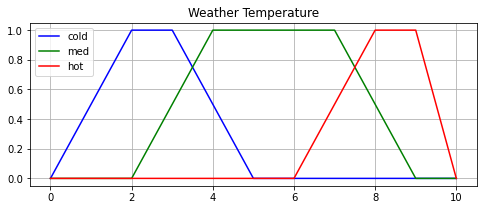

In [77]:
x_qual = np.arange(0, 11, 1)
qual_lo = fuzz.trapmf(x_qual, [0, 2, 3, 5])
qual_md = fuzz.trapmf(x_qual, [2, 4, 7, 9])
qual_hi = fuzz.trapmf(x_qual, [6, 8, 9, 10])
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='cold')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='med')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='hot')
ax0.set_title('Weather Temperature')
ax0.set_axisbelow(True)
ax0.grid()
ax0.legend()
plt.show()

In [79]:
qual_lo

array([0. , 0.5, 1. , 1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ])

In [89]:
check_low = fuzz.trapmf(np.asarray([1,1.5,2,4,8,6,3.5]), [0, 2, 3, 5]) # low membership
check_med = fuzz.trapmf(np.asarray([1,1.5,2,4,8,6,3.5]), [2, 4, 7, 9]) # med membership
print(check_low)
print(check_med)

[0.5  0.75 1.   0.5  0.   0.   0.75]
[0.   0.   0.   1.   0.5  1.   0.75]
